# Seaborn Practise

## Distribution Plots

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
tips = sb.load_dataset('tips')
#abt ppl who had a meal and then how much amt of tips they left

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distplot

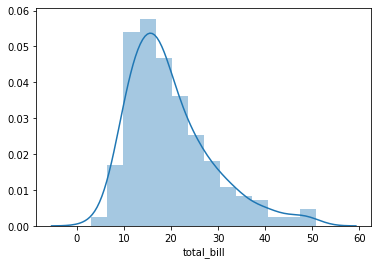

In [5]:
#shows the distributon of univariate variable
sb.distplot(tips['total_bill'])
#you get a histogram and a kde (kernel density estimate)

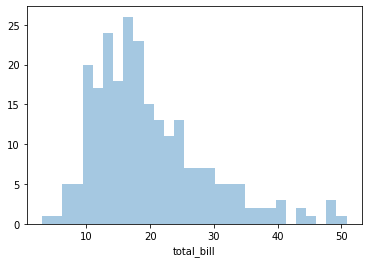

In [6]:
sb.distplot(tips['total_bill'], kde=False, bins=30)
#now you get only the histogram

### Jointplot

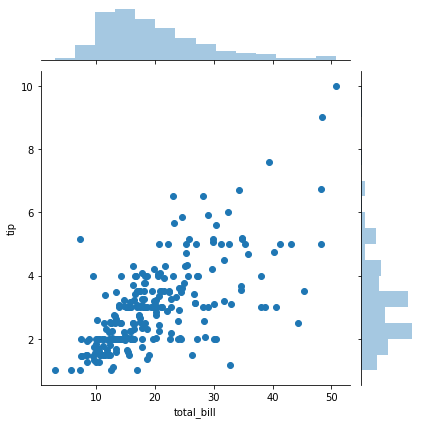

In [7]:
#can combine 2 variables 
sb.jointplot(x="total_bill",y="tip",data=tips)

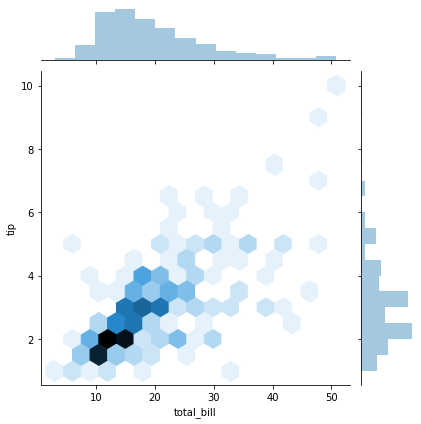

In [8]:
sb.jointplot(x="total_bill",y="tip",data=tips,kind="hex") #kind controls what happens inside the box
#the darker colour means more number of points at that value.

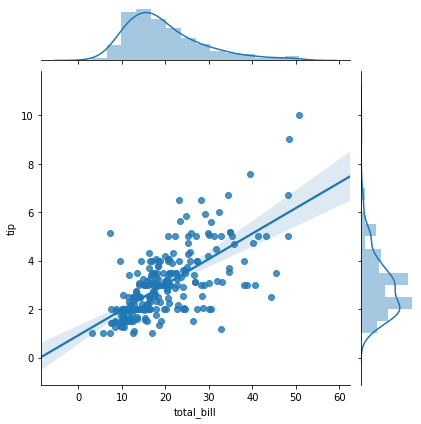

In [9]:
sb.jointplot(x="total_bill",y="tip",data=tips,kind="reg")
#scatterplot with a regression line drawn in it

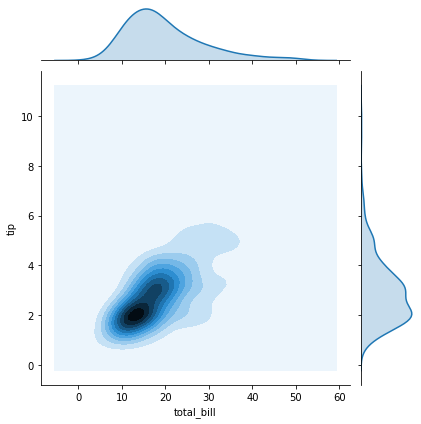

In [10]:
sb.jointplot(x="total_bill",y="tip",data=tips,kind="kde")

### Pairplot

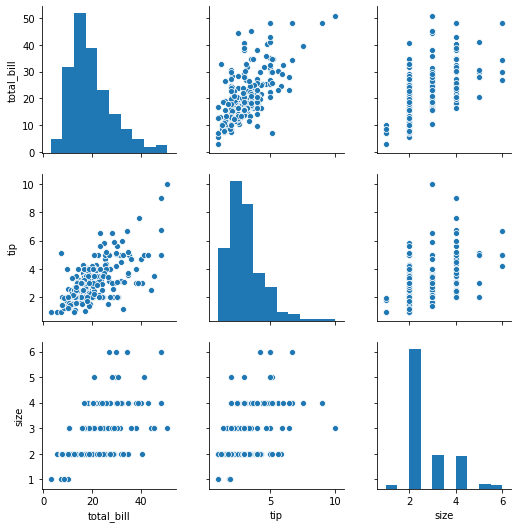

In [11]:
#plot pairwise relationships across the entire dataset
#does jointplot for every single combination
sb.pairplot(tips)

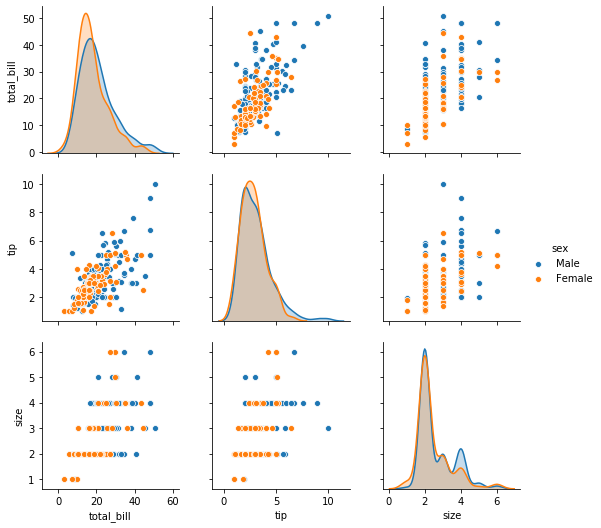

In [12]:
sb.pairplot(tips,hue='sex') #at hue you would need to pass in categorical variables

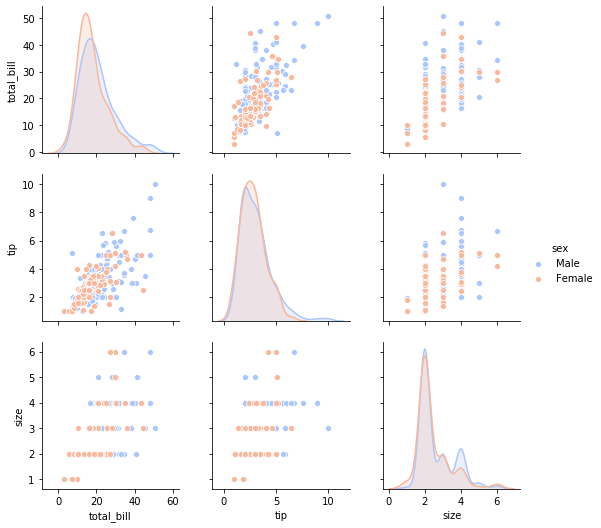

In [13]:
sb.pairplot(tips,hue='sex',palette='coolwarm')

### Rugplots

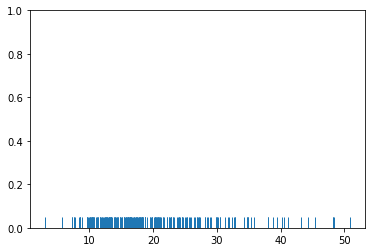

In [14]:
#pass in a single column
sb.rugplot(tips["total_bill"])
#draws a dash at every point

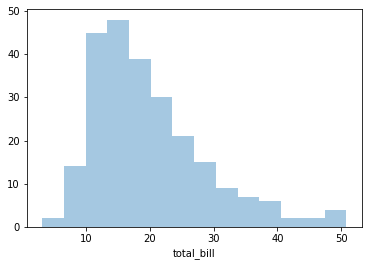

In [15]:
sb.distplot(tips["total_bill"],kde=False)
#has bins and counts the number of data points at that value
#less dashes mean bins gg to be not that high

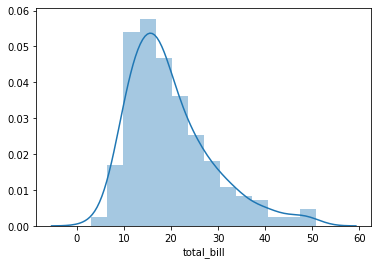

In [16]:
sb.distplot(tips["total_bill"])
#KDE - Kernel Density Estimation Plot
#sum of gaussian/normal distribution = kernel density estimation

### KDEplot

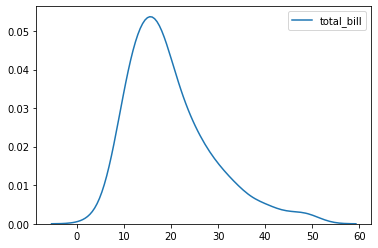

In [17]:
sb.kdeplot(tips["total_bill"])

## Categorical Plot

### Barplot

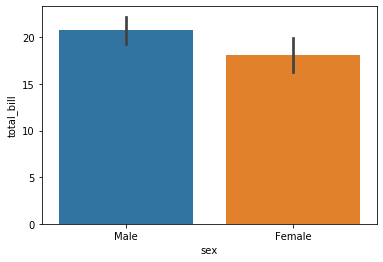

In [18]:
sb.barplot(x="sex" ,y="total_bill", data=tips)
#the average is the line
#you have both numeric and categorical variables

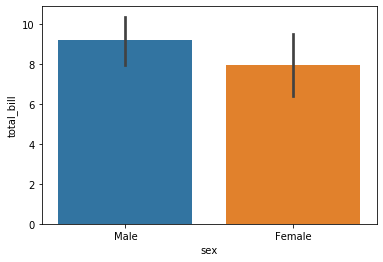

In [19]:
sb.barplot(x="sex" ,y="total_bill", data=tips, estimator=np.std)
#that woud give you the standrd deviation for each category
#you can ue other estimators too, eg median etc, by default its mean

### Countplot

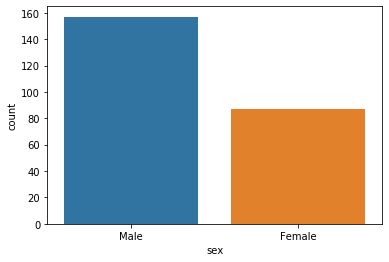

In [20]:
sb.countplot(x="sex",data=tips)
#counts 

### Boxplot 

In [21]:
#shows the distribution for variables 

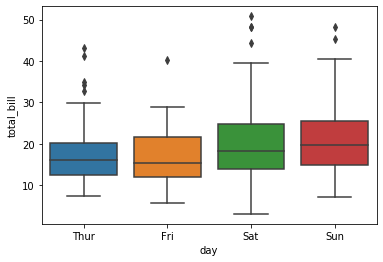

In [22]:
sb.boxplot(x="day",y="total_bill",data=tips) #seeing total bill per day

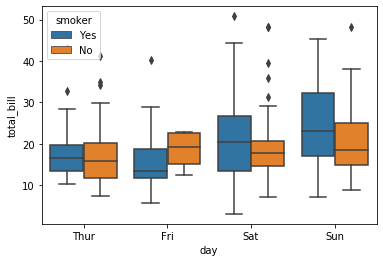

In [23]:
sb.boxplot(x="day",y="total_bill",data=tips,hue="smoker") 
#allows you to compare many variables together

### Violinplot

In [24]:
#shows the distriubtion too

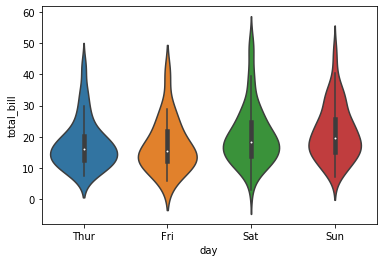

In [25]:
sb.violinplot(x="day",y="total_bill",data=tips)

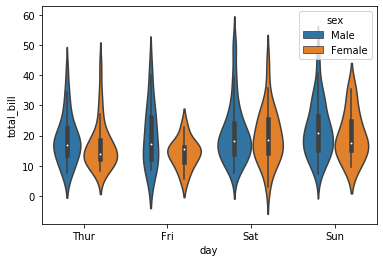

In [26]:
sb.violinplot(x="day",y="total_bill",data=tips,hue="sex")

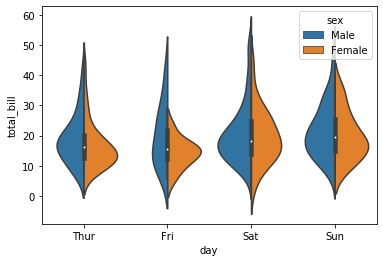

In [27]:
sb.violinplot(x="day",y="total_bill",data=tips,hue="sex",split=True)
#instead of having 2 violinplot together

### Stripplot

In [28]:
#draws a scatter plot where one variable is categorical

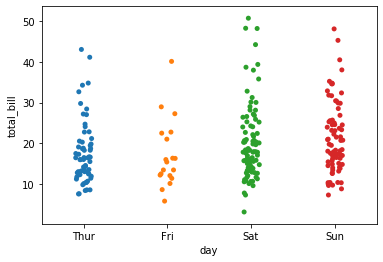

In [29]:
sb.stripplot(x="day",y="total_bill",data=tips)
#you cant exactly tell how many points are on top of eahc other

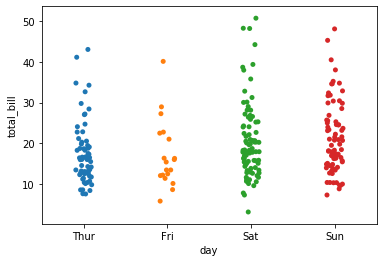

In [30]:
sb.stripplot(x="day",y="total_bill",data=tips,jitter=True)

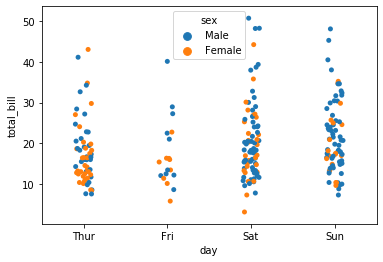

In [31]:
sb.stripplot(x="day",y="total_bill",data=tips,jitter=True,hue="sex")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


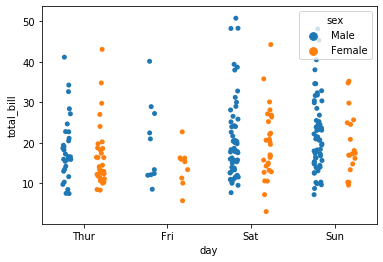

In [32]:
sb.stripplot(x="day",y="total_bill",data=tips,jitter=True,hue="sex",split="True")

### Swarmplot

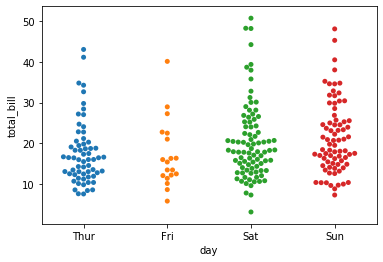

In [33]:
#points are adjusted so that they dont overlap
# scatterplot + stripplot = swarmplot
sb.swarmplot(x="day",y="total_bill",data=tips)
#shows all the points
#drawback = sometimes they dont scale that well with very large datasets

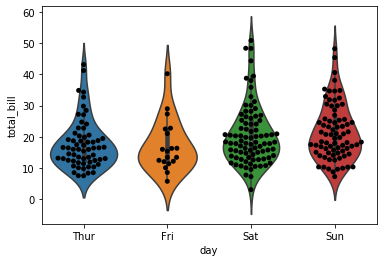

In [34]:
#swarmplot + violin plot
sb.violinplot(x="day",y="total_bill",data=tips)
sb.swarmplot(x="day",y="total_bill",data=tips,color="black")

### Factorplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


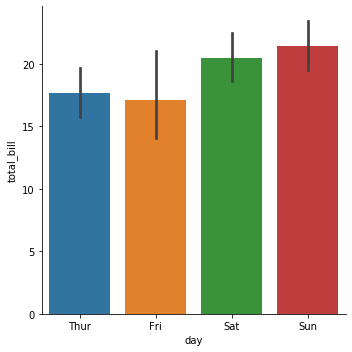

In [35]:
sb.factorplot(x="day",y="total_bill",data=tips,kind="bar")

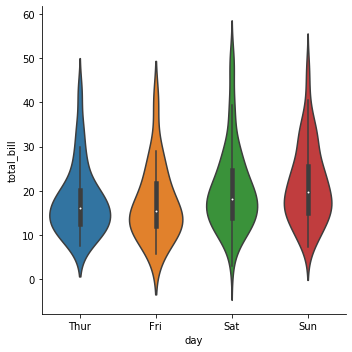

In [36]:
sb.factorplot(x="day",y="total_bill",data=tips,kind="violin")

## Matrix Plots

In [37]:
flights = sb.load_dataset("flights")

In [38]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Heatmaps

In [39]:
#data should alredy be in a matrix form the columns and the index variable names match!

In [40]:
tc = tips.corr()

In [41]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


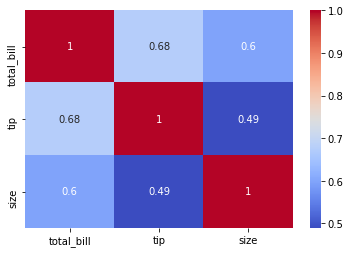

In [42]:
sb.heatmap(tc,annot=True,cmap="coolwarm")

In [43]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
#for categorical variables
fp = flights.pivot_table(index="month",columns="year",values="passengers")

In [45]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


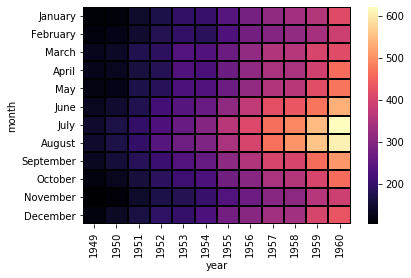

In [46]:
sb.heatmap(fp,cmap="magma",linecolor="black",linewidths=1)
#to make write boundaries

### Clustermap used the best in Clustering

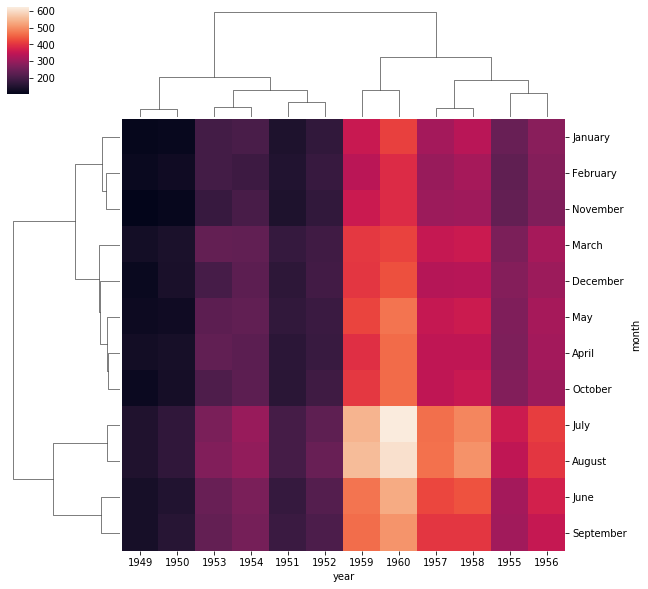

In [47]:
sb.clustermap(fp)
#most similar months/years are put together
#too see the features that are very similar to each other 

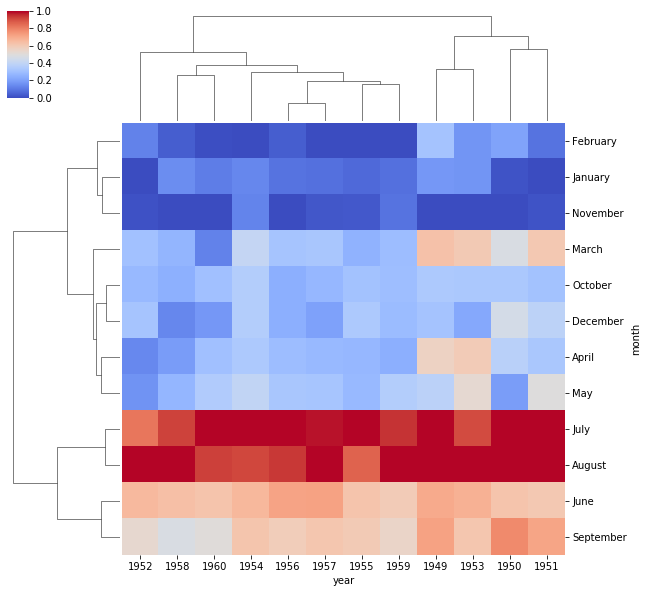

In [48]:
sb.clustermap(fp,cmap="coolwarm",standard_scale=1)

## Grids

In [49]:
iris = sb.load_dataset("iris")

In [50]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


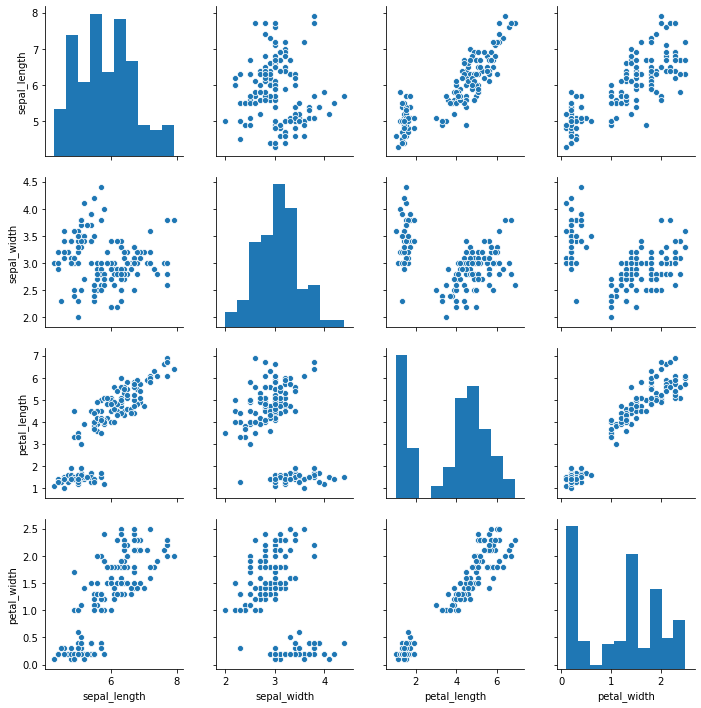

In [51]:
sb.pairplot(iris)

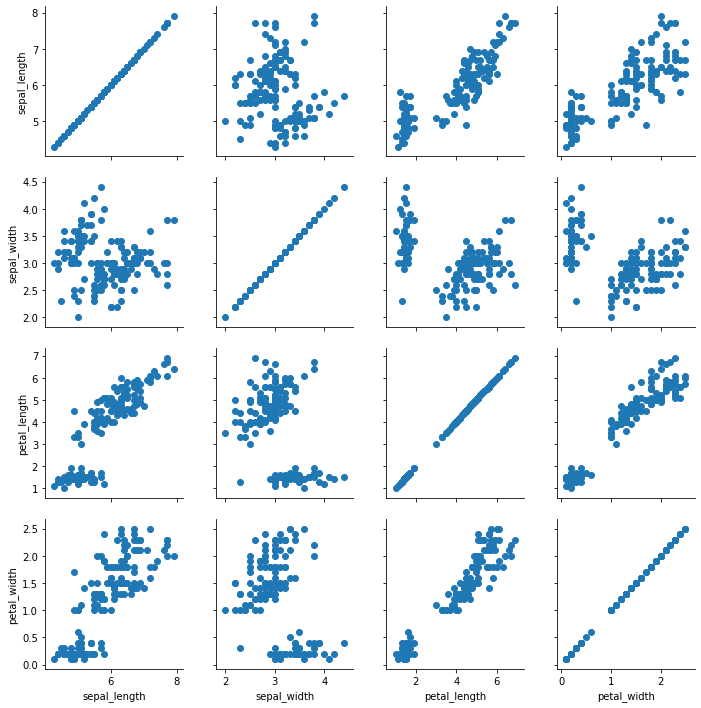

In [52]:
#customising the pairplot
g = sb.PairGrid(iris) #getting the axes
g.map(plt.scatter) #plotting scatterplot on the diagonal

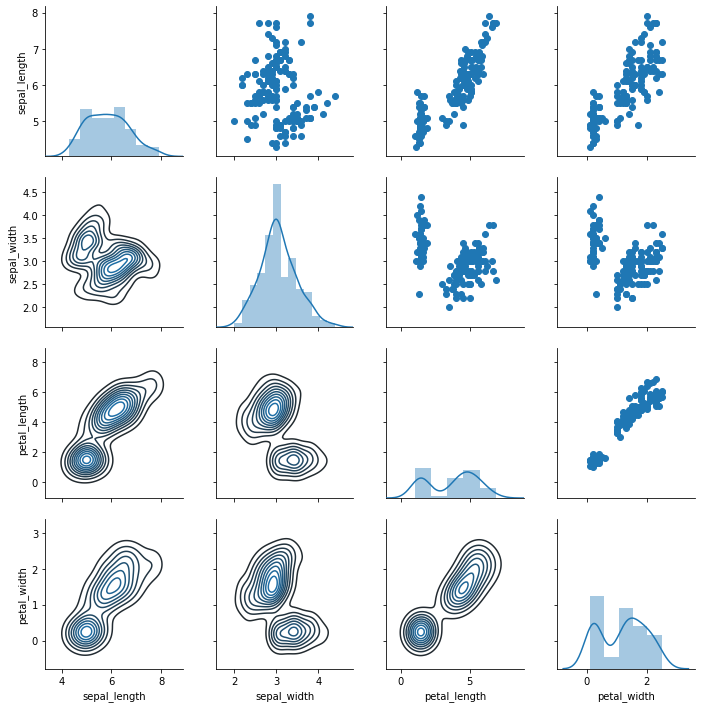

In [53]:
g = sb.PairGrid(iris)
g.map_diag(sb.distplot) 
g.map_upper(plt.scatter)
g.map_lower(sb.kdeplot)

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### FacetGrids

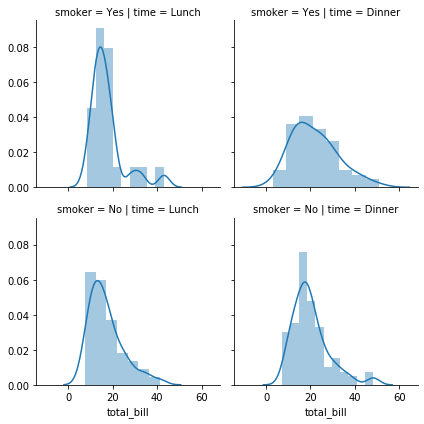

In [55]:
g = sb.FacetGrid(data=tips,col="time",row="smoker")
g.map(sb.distplot, "total_bill")
#mapping a plot type and separating the results based on certain columns and names

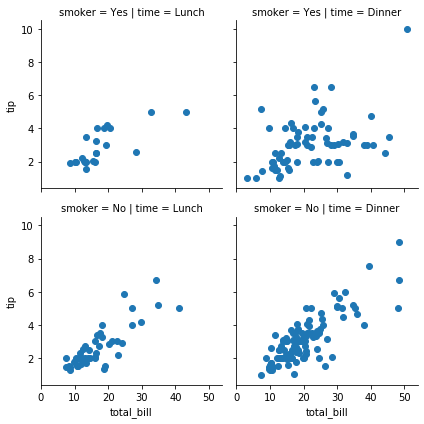

In [56]:
g = sb.FacetGrid(data=tips,col="time",row="smoker")
g.map(plt.scatter, "total_bill","tip")

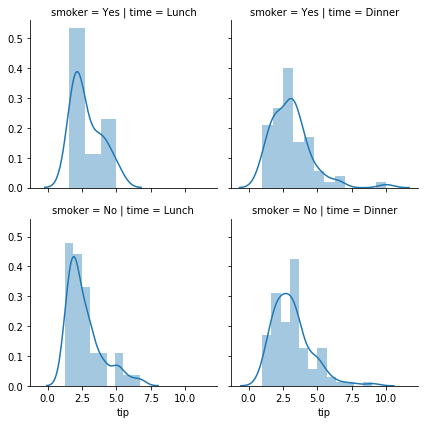

In [57]:
g = sb.FacetGrid(data=tips,col="time",row="smoker")
g.map(sb.distplot, "tip")

## Regression Plots

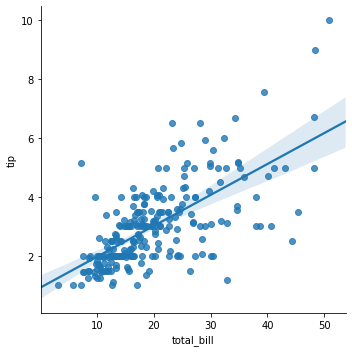

In [58]:
sb.lmplot(x="total_bill",y="tip",data=tips)

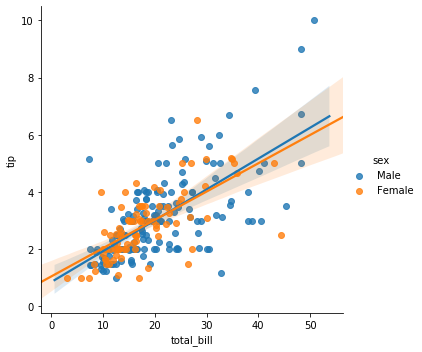

In [59]:
sb.lmplot(x="total_bill",y="tip",data=tips,hue="sex")
#2 scatterplots and 2 linear fits

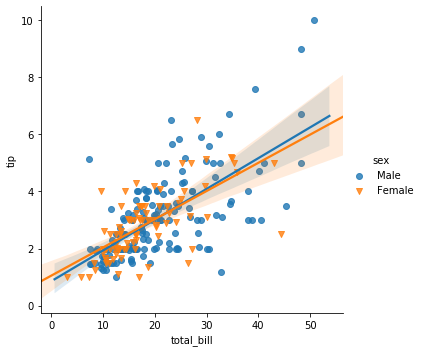

In [60]:
sb.lmplot(x="total_bill",y="tip",data=tips,hue="sex",markers=['o','v'])

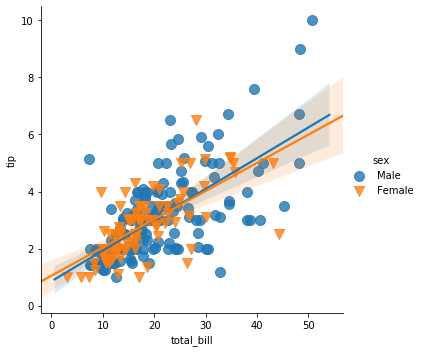

In [61]:
sb.lmplot(x="total_bill",y="tip",data=tips,hue="sex",markers=['o','v'],scatter_kws={'s':100})
#makes the markers a lot bigger
#this is a call to matplotlib

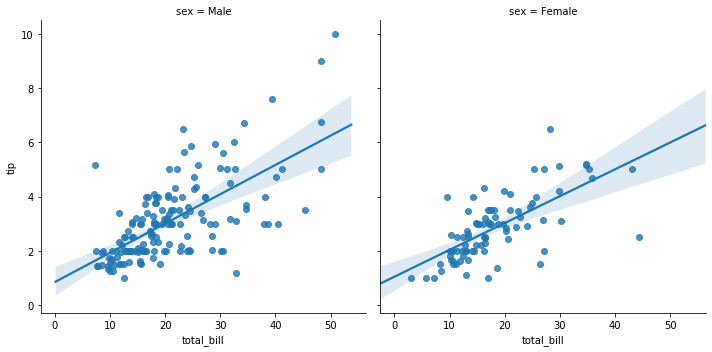

In [62]:
sb.lmplot(x="total_bill",y="tip",data=tips,col="sex")
#have 2 separate columns instead of separating by colours as done previously

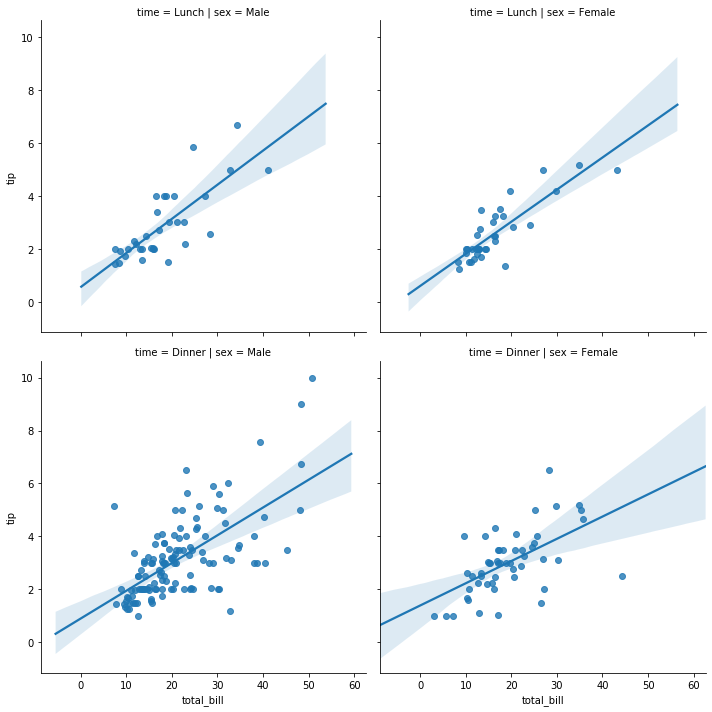

In [63]:
sb.lmplot(x="total_bill",y="tip",data=tips,col="sex",row="time")

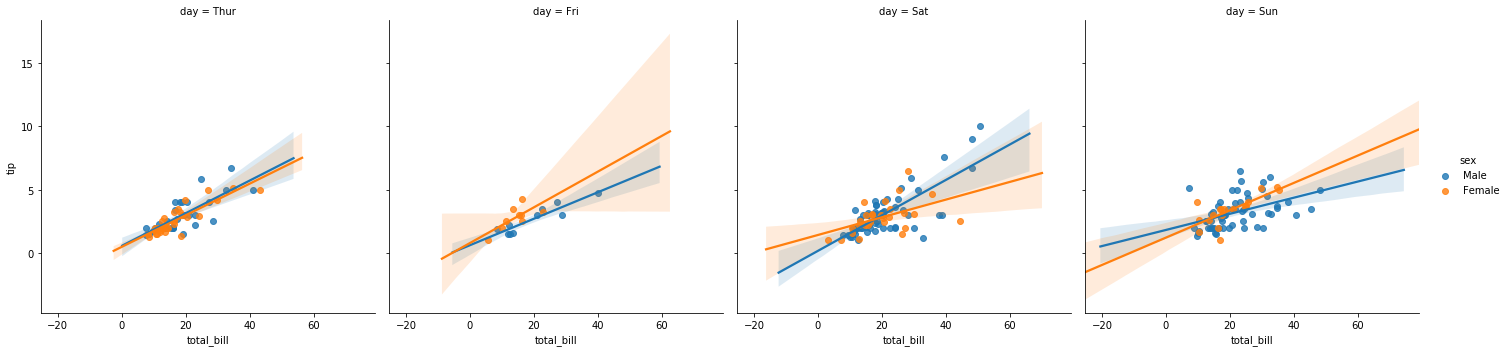

In [64]:
sb.lmplot(x="total_bill",y="tip",data=tips,col="day",hue="sex")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


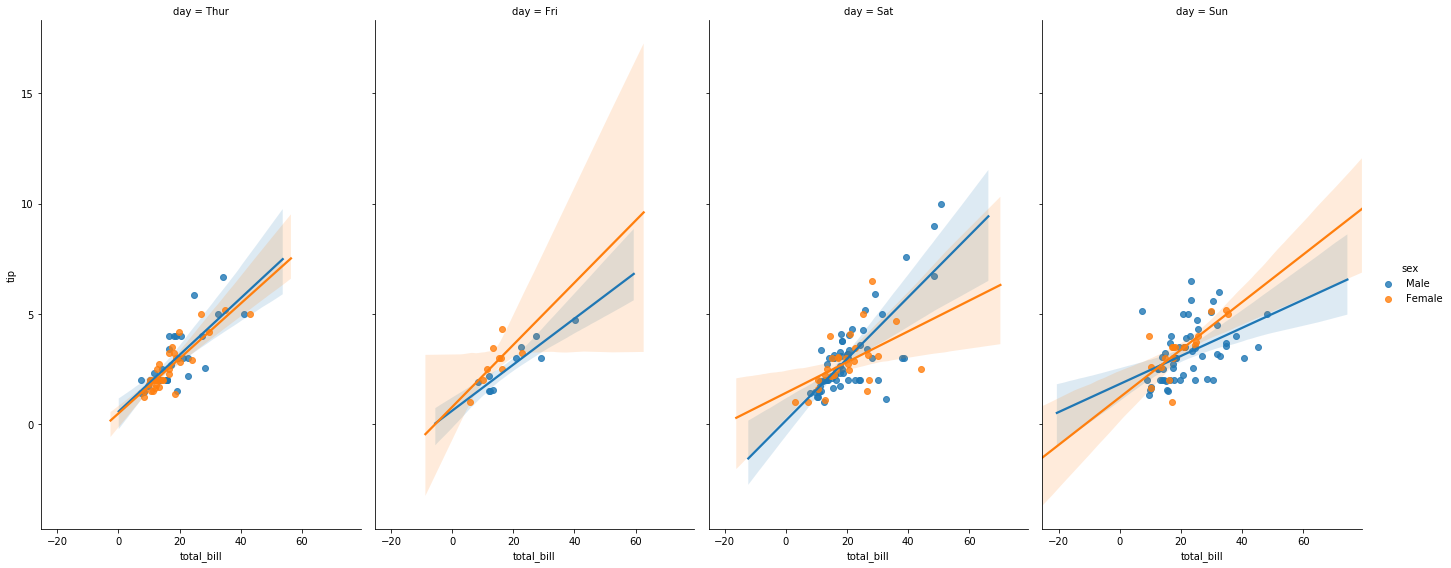

In [65]:
#adjust the size and parameters
sb.lmplot(x="total_bill",y="tip",data=tips,col="day",hue="sex",aspect=0.6,size=8)

## Style and Colour

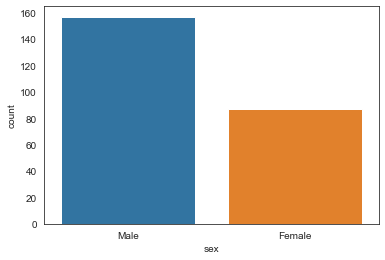

In [67]:
#seaborn has a set_style argument which allows u to set the style for the 
#rest of the plots
sb.set_style('white')
sb.countplot(x='sex',data=tips)

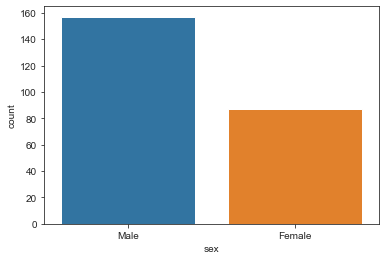

In [68]:
sb.set_style('ticks') #you get ticks at the edge of the box
sb.countplot(x='sex',data=tips)

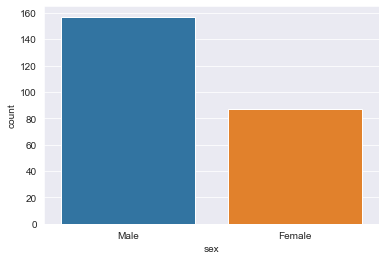

In [69]:
sb.set_style('darkgrid') #gives u the darkgrid background
sb.countplot(x='sex',data=tips)

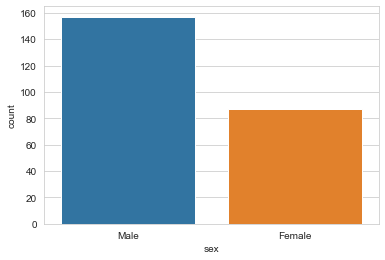

In [71]:
sb.set_style('whitegrid') #gives you a white grid at the back
sb.countplot(x='sex',data=tips)

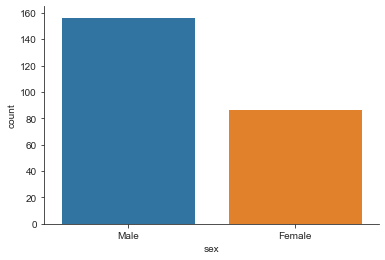

In [73]:
sb.set_style('ticks')
sb.countplot(x='sex',data=tips)
sb.despine() #removes the top border and right border

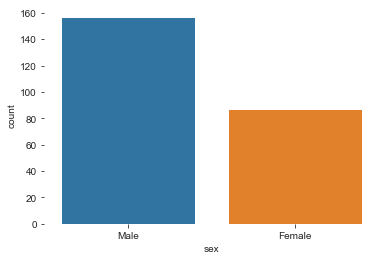

In [74]:
sb.set_style('ticks')
sb.countplot(x='sex',data=tips)
sb.despine(left=True,bottom=True) #removes all the border

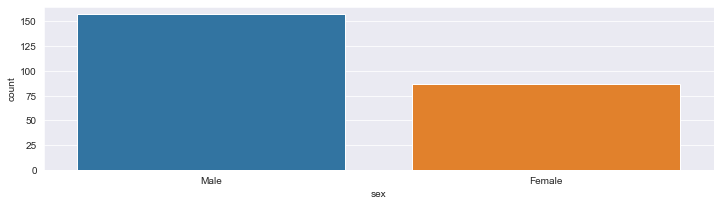

In [78]:
#To change the size and aspect ratio of the graphs using figsize
plt.figure(figsize=(12,3))
sb.set_style("darkgrid")
sb.countplot(x='sex',data=tips)

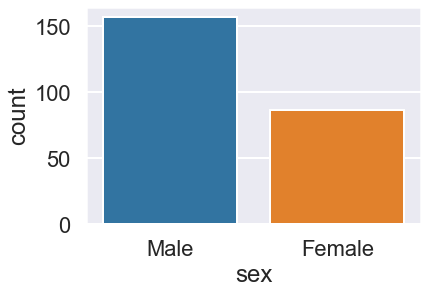

In [80]:
#creating figure for poster and not notebook
sb.set_context('poster')
sb.countplot(x='sex',data=tips)
#much larger as it is gg to be put in a poster 
#by default it is in the context of notebooks

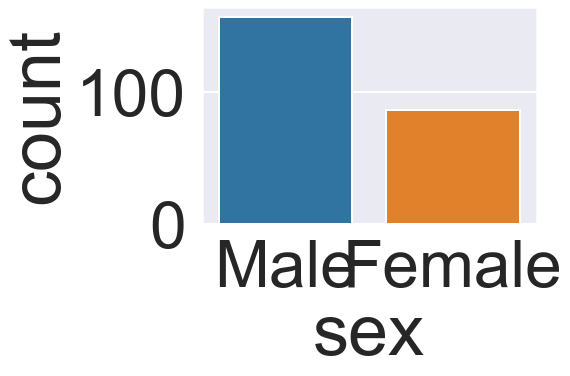

In [81]:
#creating figure for poster and not notebook
sb.set_context('poster',font_scale=3)
sb.countplot(x='sex',data=tips)
#much larger

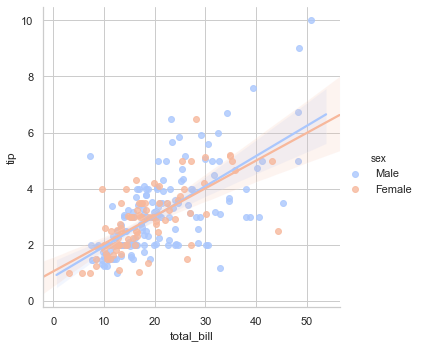

In [85]:
sb.set_context('notebook')
sb.set_style("whitegrid")
sb.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

In [86]:
#to find the palette options go to google type matplotlib colourmap 

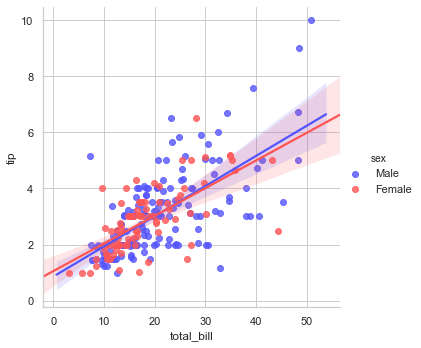

In [87]:
sb.set_context('notebook')
sb.set_style("whitegrid")
sb.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')